In [1]:
!pip install mxnet-cu101
!pip install gluonnlp pandas tqdm
!pip install sentencepiece==0.1.85
!pip install transformers==2.1.1
!pip install torch==1.3.1

     |████████████████████████████████| 551.3MB 30kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 245kB 7.7MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.8.2-cp36-none-any.whl size=293515 sha256=1ec9a7eb4b47da66a83b4f92eff8babe0368a785e6b44a0c0e18ef94958a4a52
  Stored in directory: /root/.cache/pip/wheels/a4/aa/61/0aebc5c078c4b1ccf325cd7579932b99403008da6e7ce6b68f
Successfully built gluonnlp
     |████████████████████████████████| 1.0MB 7.6MB/s 
     |████████████████████████████████| 317kB 8.6MB/s 
     |████████████████████████████████| 860kB 21.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.35-cp36-none-any.whl size=883999 sha256=030fd32294d0027fd87de84e3a3c140d62ccd6154325c3532d0654cda099a1b1
  Stored in directory: /root/.cache/pip/wheels/63/2a/db/63e2909042c634ef551d0d9ac825b2b0b32dede4a6d87ddc94
Successfully built sacremoses


In [6]:
!pip3 install git+https://git@github.com/SKTBrain/KoBERT.git@master --user

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-cq6o3hal
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-cq6o3hal
  Created wheel for kobert: filename=kobert-0.1.1-cp36-none-any.whl size=12854 sha256=63250c862f5ffdf765498057516306dc914279cef5a5fe859a5b9ea17ba5933a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ptggrglq/wheels/a2/b0/41/435ee4e918f91918be41529283c5ff86cd010f02e7525aecf3
Successfully built kobert


In [8]:
import tensorflow as tf
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
# from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

Using TensorFlow backend.


In [0]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

In [10]:
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

ModuleNotFoundError: ignored

In [0]:
from transformers import AdamW
# from transformers.optimization import WarmupLinearSchedule
from transformers import get_linear_schedule_with_warmup

In [0]:
##GPU 사용 시
device = torch.device("cuda:0")

In [0]:
bertmodel, vocab = get_pytorch_kobert_model()
vocab

In [0]:
#현재 위치가 어딘지
!pwd

/home/ec2-user/workspace/Members/KSA/newdirectory


In [0]:
!ls

30000_kobert_test.txt
30000test.txt
30000train.txt
80000.csv
bert 넣어보기
bert_dup_submission_trial.ipynb
bert_넣어보기_오류해결중.ipynb
bert_넣어보기.ipynb
bert_naver_movie_ipynb의_사본.ipynb
__init__.py
mxnet_kobert.py
naverr.csv
naver_review_classifications_pytorch_최종.ipynb
naver_review_classifications_pytorch_최종_submission-Copy1.ipynb
naver_review_classifications_pytorch_최종_submission.ipynb
naverr_t.csv
newnew.txt
new.txt
public_test.csv
__pycache__
pytorch_kobert.py
s.csv
train_model_weight_epoch3_data30000
under0.1.csv
Untitled.ipynb
utils.py
weight191228


In [0]:
# #내부적 매소드
# dir(dataset_train)

In [0]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)
tok

using cached model


In [0]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))


In [0]:
## Setting parameters
max_len = 128
batch_size = 32
warmup_ratio = 0
num_epochs = 3
max_grad_norm = 1
log_interval = 10
learning_rate =  2e-5

In [0]:
data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

In [0]:
dir(data_train)

In [0]:
data_train.sentences[0]

(array([   2,  517,  433,  522,  517,   40,  517,  432,  524,  522,  522,
         522,  522,  522,  524, 2016, 6122, 4687, 6141, 6664,  517,    5,
        1956, 3528, 7074, 6586, 2155, 5330, 1698, 3942, 2355, 7139,  517,
          54, 2929, 6141, 7126,  359,  359,  359,  517,  359,  359,  359,
        1633, 6122,    3,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(47, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [0]:
# dir(data_train)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'labels',
 'sentences']

In [0]:
data_train.sentences

[(array([   2,  517,  433,  522,  517,   40,  517,  432,  524,  522,  522,
          522,  522,  522,  524, 2016, 6122, 4687, 6141, 6664,  517,    5,
         1956, 3528, 7074, 6586, 2155, 5330, 1698, 3942, 2355, 7139,  517,
           54, 2929, 6141, 7126,  359,  359,  359,  517,  359,  359,  359,
         1633, 6122,    3,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1], dtype=int32),
  array(47, dtype=int32),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        

In [0]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

NameError: name 'data_train' is not defined

In [0]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=2,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [0]:
model = BERTClassifier(bertmodel,  dr_rate=0.1).to(device)

In [0]:
# # Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [0]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate, eps = 1e-8) # eps 0으로 나누는 것을 방지하기 위한 epsilon 값
loss_fn = nn.CrossEntropyLoss()

In [0]:
t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

In [0]:
# scheduler = get_linear_schedule_with_warmup(optimizer, warmup_steps=warmup_step, t_total=t_total) 원래이거였는데 바꿔줌
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [0]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [0]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


epoch 1 batch id 1 loss 0.6984986066818237 train acc 0.4375



KeyboardInterrupt: 

In [0]:
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
    if batch_id==2:
        break
    print(valid_length)#, segment_ids, label)
    print('*'*100)

In [0]:
torch.save(model, 'weight12')

# 불러오기

In [0]:
model = torch.load('weight191228')

In [0]:
import pandas as pd

df_pub_test = pd.read_csv('public_test.csv', encoding='cp949')
df_pub_test.head()

,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...


In [0]:
def softmax(l_x):
    a=np.exp(l_x[0]) + np.exp(l_x[1])
    b=np.exp(l_x[1])
    return b/a 

In [0]:
dataset_ttest = nlp.data.TSVDataset("newnew.txt", field_indices=[1,2], num_discard_samples=1)

In [0]:
max_len = 128
data_ttest = BERTDataset(dataset_ttest, 0, 1, tok, max_len, True, False)

In [0]:
ttrain_dataloader = torch.utils.data.DataLoader(data_ttest, batch_size=1, num_workers=5)

In [0]:
import time
time_i = time.time()
df_res = pd.DataFrame([[]])
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(ttrain_dataloader):
#     if batch_id==3:
#         break
    token_ids = token_ids.long().to(device)
    segment_ids = segment_ids.long().to(device)
    valid_length= valid_length
    label = label.long().to(device)
    out = model(token_ids, valid_length, segment_ids)
    out_cpu = out.cpu().detach().numpy()
    df_res = pd.concat([df_res, pd.DataFrame(out_cpu)])
#     print(out)
#     print(batch_id)
print(time.time() - time_i)

In [0]:
df_res

,0,1
0,NaN,NaN
0,2.859190,-3.214027
0,2.860448,-3.215341
0,2.857179,-3.211832
0,2.858668,-3.213467
0,2.859164,-3.213759
0,2.858508,-3.212970
0,2.859878,-3.214997
0,2.859966,-3.215109
0,2.858495,-3.213238


In [0]:
df_res.to_csv('s_191228_SKTBert_proto.csv', index=False)

In [0]:
df_res['smishing'] = df_res.apply(lambda row: softmax([row[0], row[1]]), axis=1)
df_res

,0,1,smishing
0,NaN,NaN,NaN
0,2.859190,-3.214027,0.002298
0,2.860448,-3.215341,0.002293
0,2.857179,-3.211832,0.002308
0,2.858668,-3.213467,0.002301
0,2.859164,-3.213759,0.002299
0,2.858508,-3.212970,0.002302
0,2.859878,-3.214997,0.002295
0,2.859966,-3.215109,0.002294
0,2.858495,-3.213238,0.002302


(array([  2.,   0.,   1.,   4.,  12.,  24.,  41.,  78., 118., 170., 232.,
        330., 251., 164., 129.,  39.,  12.,  15.,   2.,   2.]),
 array([0.0022585 , 0.00226194, 0.00226538, 0.00226882, 0.00227226,
        0.0022757 , 0.00227914, 0.00228258, 0.00228602, 0.00228946,
        0.0022929 , 0.00229634, 0.00229978, 0.00230322, 0.00230666,
        0.0023101 , 0.00231354, 0.00231698, 0.00232041, 0.00232385,
        0.00232729]),
 <a list of 20 Patch objects>)

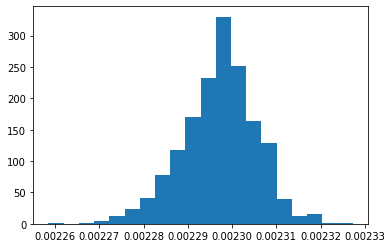

In [0]:
import matplotlib.pyplot as plt
plt.hist(df_res['smishing'], bins=20)

In [0]:
df_res[df_res['smishing'] > 0.8]['smishing']

Series([], Name: smishing, dtype: float64)

In [0]:
torch.cuda.empty_cache()

In [0]:
out_cpu2 = out_cpu.copy()
out_cpu2

array([[ 2.8591893, -3.2140245],
       [ 2.860449 , -3.215341 ],
       [ 2.8571787, -3.2118323],
       [ 2.858667 , -3.2134652],
       [ 2.8591614, -3.2137575],
       [ 2.8585086, -3.212971 ],
       [ 2.8598793, -3.2149982],
       [ 2.8599648, -3.2151055],
       [ 2.8584921, -3.2132385],
       [ 2.8603246, -3.2150524],
       [ 2.858446 , -3.2132905],
       [ 2.859313 , -3.2142622],
       [ 2.8625271, -3.2170854],
       [ 2.8591676, -3.2143388],
       [ 2.8601031, -3.2148993],
       [ 2.8604317, -3.2155461],
       [ 2.8601563, -3.2150836],
       [ 2.8587143, -3.2135057],
       [ 2.8572524, -3.212094 ],
       [ 2.8599536, -3.2142675],
       [ 2.861967 , -3.2163956],
       [ 2.862346 , -3.216704 ],
       [ 2.8604615, -3.215399 ],
       [ 2.8581603, -3.21294  ],
       [ 2.8586607, -3.2139466],
       [ 2.8594756, -3.213962 ],
       [ 2.8565333, -3.2116816],
       [ 2.8574471, -3.212314 ],
       [ 2.8582962, -3.2133672],
       [ 2.8587234, -3.2135198],
       [ 2

In [0]:
out_sm = softmax(out.cpu().detach().numpy())
#to.device의 반대임 훈련할때 GPU로 자료를 보내는것

In [0]:
out_sm

array([0.5003149 , 0.49967086], dtype=float32)

In [0]:
out = softmax(out[0])
#to.device의 반대임 훈련할때 GPU로 자료를 보내는것

IndexError: invalid index to scalar variable.

In [0]:
out

array([0.49944103, 0.5003946 ], dtype=float32)

In [0]:
#첫번째 행만 실험
df_pub_test['text'][:1].apply(lambda x: test_sentences([x]))

AttributeError: 'str' object has no attribute 'tokenize'

In [0]:
df_pub_test['text'][:1]

0    XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
Name: text, dtype: object

In [0]:
#없어도 됨. 2개의 세트 하나로 인식하여 갯수 세주는것
df_pub_test['text'].apply(lambda x: test_sentences([x])[0]).value_counts()

TypeError: forward() got an unexpected keyword argument 'token_type_ids'

In [0]:
# 22:11 저장